In [2]:
from neural_net import ann_model, mse, test_dataset, test_labels, train_dataset, train_labels
from KNN import knn_model, pipe95
import pandas as pd

# test_df = pd.read_csv('archive/acs2015_census_tract_data.csv')
# test_df = test_df.dropna()
# test_df = test_df[['TotalPop', 'Men', 'Women',
#        'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
#        'IncomePerCap',
#        'Professional', 'Service', 'Office', 'Construction',
#        'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
#        'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
#        'SelfEmployed', 'FamilyWork']]

Epoch 1/150
1179/1179 - 7s - loss: 88939112.0000 - val_loss: 57326972.0000 - 7s/epoch - 6ms/step
Epoch 2/150
1179/1179 - 6s - loss: 54616516.0000 - val_loss: 53365588.0000 - 6s/epoch - 5ms/step
Epoch 3/150
1179/1179 - 5s - loss: 52790296.0000 - val_loss: 50571544.0000 - 5s/epoch - 4ms/step
Epoch 4/150
1179/1179 - 5s - loss: 50289580.0000 - val_loss: 52136948.0000 - 5s/epoch - 4ms/step
Epoch 5/150
1179/1179 - 5s - loss: 47848832.0000 - val_loss: 51705952.0000 - 5s/epoch - 4ms/step
Epoch 6/150
1179/1179 - 5s - loss: 46321680.0000 - val_loss: 45959480.0000 - 5s/epoch - 4ms/step
Epoch 7/150
1179/1179 - 6s - loss: 45408904.0000 - val_loss: 46481260.0000 - 6s/epoch - 5ms/step
Epoch 8/150
1179/1179 - 5s - loss: 44748304.0000 - val_loss: 50174764.0000 - 5s/epoch - 4ms/step
Epoch 9/150
1179/1179 - 6s - loss: 44559264.0000 - val_loss: 45642976.0000 - 6s/epoch - 5ms/step
Epoch 10/150
1179/1179 - 5s - loss: 44356572.0000 - val_loss: 44402736.0000 - 5s/epoch - 5ms/step
Epoch 11/150
1179/1179 - 6s -

In [3]:
class Model:
    def __init__(self, knn_weight, ann_weight, bayes_weight, logreg_weight) -> None:
        self.knn_weight = knn_weight
        self.ann_weight = ann_weight
        self.bayes_weight = bayes_weight
        self.logreg_weight = logreg_weight
        assert(abs(1 - (knn_weight + ann_weight + bayes_weight + logreg_weight)) < 1e-3)
        self.knn = knn_model
        self.ann = ann_model
        #self.bayes = bayes_model
        #self.logreg = logreg_model
    
    def predict(self, x):
        return self.knn.predict(pipe95.transform(x))*self.knn_weight + self.ann.predict(x)*self.ann_weight # + self.bayes_model.predict(x)*self.bayes_weight + self.logreg.predict(x)*self.logreg_weight

In [10]:
import matplotlib.pyplot as plt
neural_net_weights = []
mses = []

for weight in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    _model = Model(ann_weight=weight, knn_weight=1.0-weight, bayes_weight=0.0, logreg_weight=0.0)   
    y_prime = _model.predict(test_dataset.drop(columns=['IncomePerCap']))
    y = test_labels.to_numpy()
    # print(y_prime, y, y_prime.shape, y.shape)
    neural_net_weights.append(100*weight)
    mses.append(mse(y, y_prime))

mses

228/228 [==============================] - 1s 4ms/step


[274648761.8839384,
 229155865.96453723,
 188583609.21094775,
 152931988.4032653,
 122201013.20120372,
 96390676.72190225,
 75500970.52890924,
 59531916.959049396,
 48483491.171454854,
 42355710.09066825,
 41148564.76356533]

TypeError: 'str' object is not callable

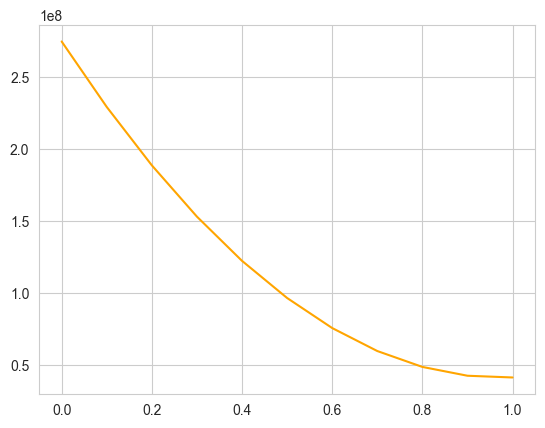

In [29]:
import seaborn as sns
sns.set_style('whitegrid')
plt.plot(neural_net_weights, mses, color='orange')
plt.xlabel('Percentage of weight on ANN prediction')
plt.ylabel('MSE')
plt.show()